In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[texte du lien](https://)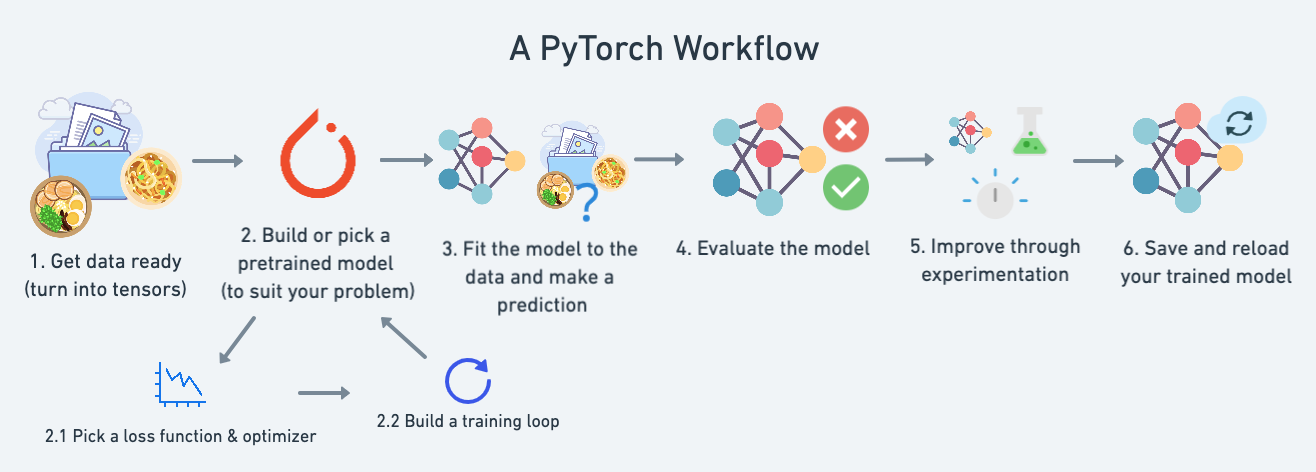

# Nouvelle section
what_were_covering = 1 : « données (préparer et charger) », 2 : « créer un modèle », 3 : « adapter le modèle aux données (entraînement) », 4 : « faire des prédictions et évaluer un modèle (inférence) », 5 : « enregistrer et charger un modèle », 6 : « assembler le tout »

In [28]:
from torch import nn

## creation des données artificielles pour entrainer un modèle lineaire de nn avec pytorch
weight = 0.7
bias = 0.3
# variable X,y
X = torch.arange(start = 0, end = 2, step = 0.02).unsqueeze(dim = 1)
y = weight * X + bias
print(X.shape, X.ndim)

torch.Size([100, 1]) 2


In [29]:
y.shape, y.ndim

(torch.Size([100, 1]), 2)

In [30]:
X[:20], y[:20]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660]]))

In [31]:
### Diviser les données en entrainement et en test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

torch.Size([80, 1]) torch.Size([80, 1])
torch.Size([20, 1]) torch.Size([20, 1])


In [32]:
### visualisations des données
def visualize_data(xtrain, ytrain, xtest, ytest):
  plt.figure(figsize = (10, 7))
  plt.scatter(xtrain, ytrain, c = "b", s = 4, label = "données entrainement")
  plt.scatter(xtest, ytest, c = "g", s = 4, label = "données test")
  plt.legend()
  plt.show()

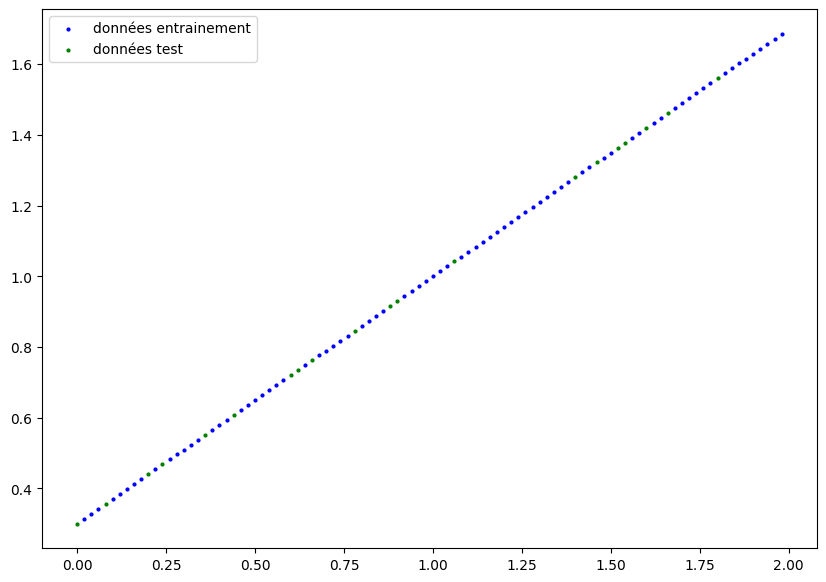

In [33]:
visualize_data(xtrain, ytrain, xtest, ytest)

In [41]:
### building the model

class LinearRegressionModel(nn.Module):
  def __init__(self) :
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float,
                                            requires_grad = True))
    self.bias = nn.Parameter(torch.randn(1, dtype= torch.float,
                                         requires_grad=True))
  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias


In [61]:
torch.manual_seed(80)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.7320], requires_grad=True),
 Parameter containing:
 tensor([-0.6587], requires_grad=True)]

In [36]:
torch.manual_seed(1234)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.0461], requires_grad=True),
 Parameter containing:
 tensor([0.4024], requires_grad=True)]

In [42]:
### verifions les parmetres du model

torch.manual_seed(42)
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [62]:
## les contenants du models
model.state_dict()

OrderedDict([('weights', tensor([0.7320])), ('bias', tensor([-0.6587]))])

In [63]:
### passons les données xtest au model avec la methode inference_mode () pour voir comment le modèle prédit prédisement
with torch.inference_mode():
  y_pred = model(xtest)

In [64]:
ytest.shape, y_pred.shape

(torch.Size([20, 1]), torch.Size([20, 1]))

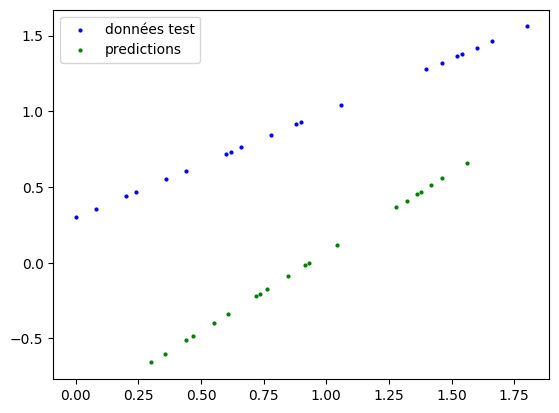

In [65]:
plt.scatter(xtest, ytest, c = "b", s = 4, label = "données test")
plt.scatter(ytest, y_pred, c = 'g', s = 4, label = "predictions")
plt.legend()
plt.show()

In [66]:
y_pred[:5]

tensor([[ 5.5648e-01],
        [ 1.1726e-01],
        [ 3.6615e-01],
        [ 1.3071e-04],
        [-1.4510e-02]])

In [67]:
ytest[:5]

tensor([[1.4620],
        [1.0420],
        [1.2800],
        [0.9300],
        [0.9160]])

In [68]:
### Training Model( perte function, fonctioon optimisation)

""" function de perte et d'optimisation """
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [69]:
### training and testiing loop in pytorch

epochs = 100
torch.manual_seed(42)
training_loss = []
testing_loss = []
epochs_count = []

for epoch  in range(epochs):
  ## training model
  model.train()
  pred = model(xtrain)
  ## finction de perte et d'optimisation
  loss_fn = loss(pred, ytrain)
  optimizer.zero_grad()
  ## retour propagation
  loss_fn.backward()
  optimizer.step()
### testting loop
  model.eval()
### predictions
  with torch.inference_mode():
    test_pred = model(xtest)
    test_loss = loss(test_pred, ytest.type(torch.float))
  if epoch %10 ==0:
    epochs_count.append(epoch)
    training_loss.append(loss_fn.detach().numpy())
    testing_loss.append(test_loss.detach().numpy())
    print(f"epoch: {epoch} | MAE: {loss_fn} | test_MAE: {test_loss}")


epoch: 0 | MAE: 0.9261845350265503 | test_MAE: 0.9111562967300415
epoch: 10 | MAE: 0.723162055015564 | test_MAE: 0.7208212018013
epoch: 20 | MAE: 0.5201394557952881 | test_MAE: 0.5304861068725586
epoch: 30 | MAE: 0.31733107566833496 | test_MAE: 0.34152787923812866
epoch: 40 | MAE: 0.24516570568084717 | test_MAE: 0.26213884353637695
epoch: 50 | MAE: 0.2216145545244217 | test_MAE: 0.24269428849220276
epoch: 60 | MAE: 0.20770421624183655 | test_MAE: 0.23051945865154266
epoch: 70 | MAE: 0.19649651646614075 | test_MAE: 0.21850259602069855
epoch: 80 | MAE: 0.18578335642814636 | test_MAE: 0.20656058192253113
epoch: 90 | MAE: 0.17514684796333313 | test_MAE: 0.19467546045780182


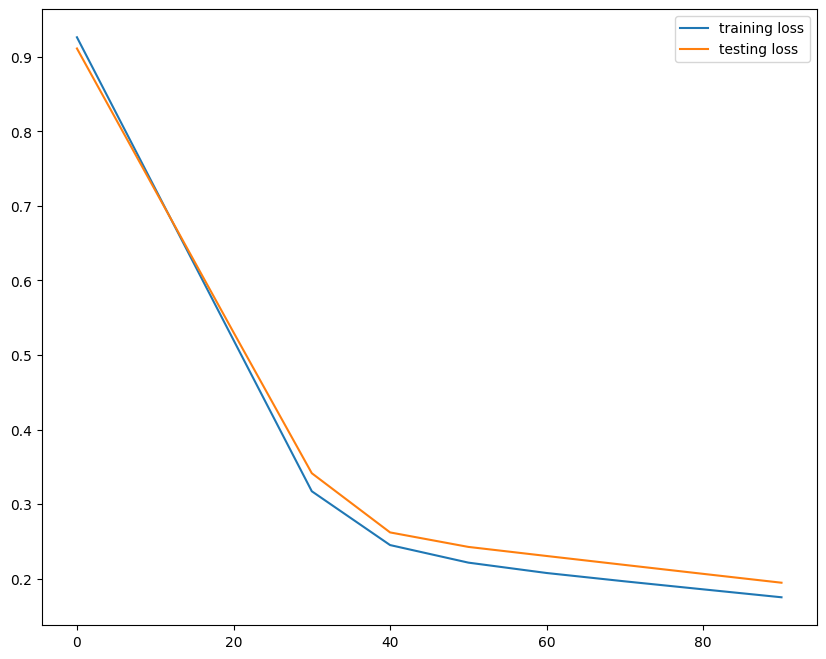

In [70]:
### learning curves
plt.figure(figsize = (10,8))
plt.plot(epochs_count, training_loss, label = "training loss")
plt.plot(epochs_count, testing_loss, label = "testing loss")
plt.legend()
plt.show()

In [72]:
### making the predictions

model.eval()
with torch.inference_mode():
  pred = model(xtest)
pred[:5]

tensor([[1.5881],
        [0.9796],
        [1.3244],
        [0.8173],
        [0.7971]])

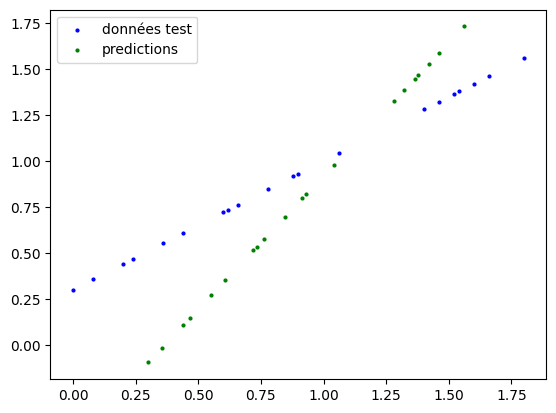

In [74]:
plt.scatter(xtest, ytest, c = "b", s = 4, label = "données test")
plt.scatter(ytest, pred, c = 'g', s = 4, label = "predictions")
plt.legend()
plt.show()

In [76]:
### enregistrer le model et le chargement
### il faut definir le chemin d'enregistrement du modele avec pathlib
from pathlib import Path
model_path = Path("first_model")
model_path.mkdir(parents = True, exist_ok = True)

## create model name
model_name = "first_model.pth"
model_save_path = model_path / model_name

print(model_save_path)
torch.save(obj = model.state_dict(), f = model_save_path)

first_model/first_model.pth


In [77]:
! ls -l first_model/first_model.pth

-rw-r--r-- 1 root root 1520 Oct 13 21:47 first_model/first_model.pth


In [78]:
### loading model (chargement du modele)
model_linear = LinearRegressionModel()
model_linear.load_state_dict(torch.load(f = model_save_path))

<ipython-input-78-0fca4d1fbe5d>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_linear.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [90]:
X_test = torch.arange(start = 1, end = 10, step = 0.02).unsqueeze(dim = 1)
model_linear.eval()
with torch.inference_mode():
  pred_linear = model_linear(X_test)
pred_linear[:10] == pred[:10]


tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])



*   Exercices
Tous les exercices ont été inspirés du code présent dans le cahier.


1...Créez un ensemble de données en ligne droite à l’aide de la formule de régression linéaire ( weight * X + bias).

2---Définissez weight=0.3et bias=0.9il devrait y avoir au moins 100 points de données au total.
3--Divisez les données en 80 % de formation et 20 % de tests.
4--Tracez les données de formation et de test afin qu'elles deviennent visuelles.
5--Construisez un modèle PyTorch en sous-classant nn.Module.

À l'intérieur, il devrait y avoir un initialisé aléatoirement nn.Parameter()avec requires_grad=True, un pour weightset un pour bias.
Implémentez la forward()méthode pour calculer la fonction de régression linéaire que vous avez utilisée pour créer l’ensemble de données dans 1.
Une fois le modèle construit, créez-en une instance et vérifiez son state_dict().
Remarque : si vous souhaitez l'utiliser nn.Linear()à la place de, nn.Parameter()vous pouvez le faire.
Créez une fonction de perte et un optimiseur en utilisant nn.L1Loss()et torch.optim.SGD(params, lr)respectivement.
6+++Définissez le taux d’apprentissage de l’optimiseur sur 0,01 et les paramètres à optimiser doivent être les paramètres du modèle que vous avez créé en 2.
7++Écrivez une boucle d’entraînement pour effectuer les étapes d’entraînement appropriées pour 300 époques.
La boucle d’entraînement doit tester le modèle sur l’ensemble de données de test toutes les 20 époques.
8++Faites des prédictions avec le modèle formé sur les données de test.
9++Visualisez ces prédictions par rapport aux données d'entraînement et de test d'origine ( Remarque : vous devrez peut-être vous assurer que les prédictions ne sont pas sur le GPU si vous souhaitez utiliser des bibliothèques non compatibles CUDA telles que matplotlib pour tracer).
9++Enregistrez vos modèles formés state_dict()dans un fichier.
10++Créez une nouvelle instance de votre classe modèle que vous avez créée en 2. et chargez-la dans celle state_dict()que vous venez d'enregistrer.
11++Effectuez des prédictions sur vos données de test avec le modèle chargé et confirmez qu'elles correspondent aux prédictions du modèle d'origine à partir de 4.
*   Élément de liste



# **Correction de l'exercicce**

In [91]:
#### Correction de l'exercice
### importing the librairies
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [93]:
"###Question 1"
## y = a X + b <<<<--- a: le poids , b =le biais, X: les inputs
torch.manual_seed(42)

X = torch.arange(start = 0, end = 3, step = 0.03).unsqueeze(dim = 1)
### Question2
a = 0.3
b = 0.9
y = a * X + b
print(X.shape, y.shape)
print(X[:5], y[:5])

torch.Size([100, 1]) torch.Size([100, 1])
tensor([[0.0000],
        [0.0300],
        [0.0600],
        [0.0900],
        [0.1200]]) tensor([[0.9000],
        [0.9090],
        [0.9180],
        [0.9270],
        [0.9360]])


In [94]:
### Question 3

### diviser les donneés
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(Xtrain.shape, Ytrain.shape)
print(Xtest.shape, Ytest.shape)

torch.Size([80, 1]) torch.Size([80, 1])
torch.Size([20, 1]) torch.Size([20, 1])


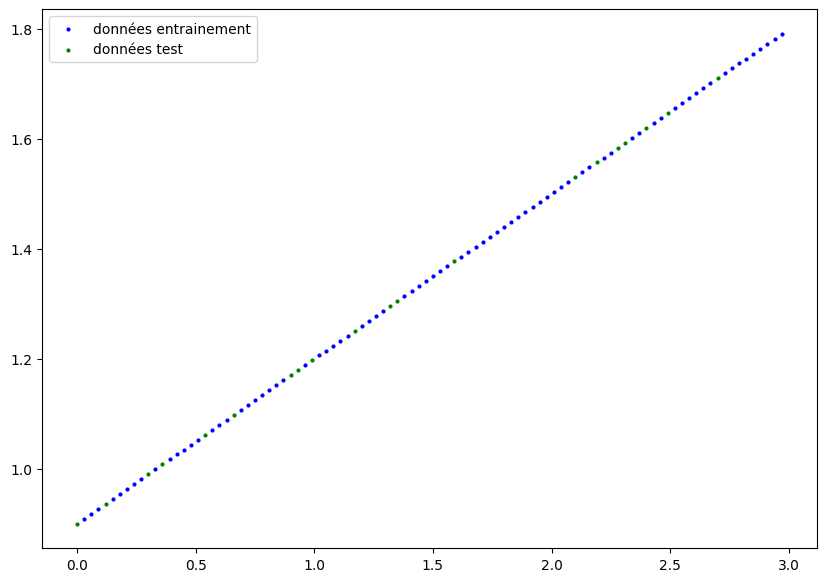

In [95]:
### Question4
visualize_data(Xtrain, Ytrain, Xtest, Ytest)

In [98]:
### question 6: Contrusction d'un modèle pytorch

class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1, out_features=1)
    ## foward
  def forward(self, x = torch.Tensor):
    return self.linear_layer(x)

In [99]:
###  : les parameters du models

modelv1 = LinearRegressionModelV1()
list(modelv1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [100]:
modelv1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [101]:
### fonction de perte et d'optimisation

Loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params = modelv1.parameters(), lr = 0.01)

### indference du mode
with torch.inference_mode():
  predictions = modelv1(Xtest)
predictions[:5]

tensor([[2.7337],
        [2.0456],
        [2.4355],
        [1.8621],
        [1.8392]])

In [108]:
###Question7: boucle d'entrainement du model et testing loop
training = []
testing = []
epochs = 300
for epoch in range(epochs):
  modelv1.train()
  ## predictions
  pred = modelv1(Xtrain)
  ### fonction de perte training
  loss  = Loss(pred, Ytrain)
  optimizer.zero_grad()
  ## retour propagation
  loss.backward()
  optimizer.step()
  ## testting loop
  modelv1.eval()
  with torch.inference_mode():
    test_pred = modelv1(Xtest)
    test_loss = Loss(test_pred, Ytest)
    ### perte sur le test
    training.append(loss.detach().numpy())
    testing.append(test_loss.detach().numpy())

    if epoch % 20 == 0:
      print(f"epoch: {epoch} | loss: {training} | test_loss: {testing}")

epoch: 0 | loss: [array(0.00974625, dtype=float32)] | test_loss: [array(0.02054225, dtype=float32)]
epoch: 20 | loss: [array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32), array(0.02343381, dtype=float32), array(0.00974625, dtype=float32)] | test_loss: [array(0.02054225, dtype=float32), array(0.0098073, dtype=float32), array(0.02054225, dtype=float32), array(0.0098073, dtype=float32), array(0.02054225, d

In [109]:
### prediction avec le model
modelv1.eval()
with torch.inference_mode():
  pred = modelv1(Xtest)
pred[:5]

tensor([[1.6376],
        [1.3673],
        [1.5204],
        [1.2952],
        [1.2862]])

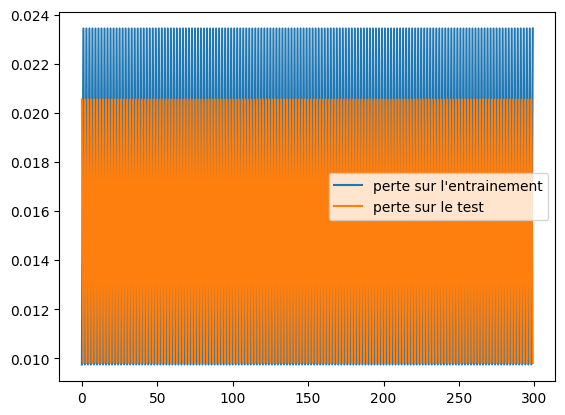

In [110]:
### Question 8: visualisations
plt.plot(training, label = "perte sur l'entrainement")
plt.plot(testing, label = 'perte sur le test')
plt.legend()
plt.show()

In [111]:
### enregistrer le modèle
model_path = Path("model_v1")
model_path.mkdir(parents = True, exist_ok = True)
model_name = "model_v1.pth"
model_save_path = model_path / model_name
torch.save(obj = modelv1.state_dict(), f = model_save_path)

In [112]:
### chargement du model
modelv2 = LinearRegressionModelV1()
modelv2.load_state_dict(torch.load(f = model_save_path))

<ipython-input-112-b44b234be3be>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelv2.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

In [115]:
xtest = torch.arange(start = 1, end = 10, step = 0.02).unsqueeze(dim = 1)
modelv2.eval()
with torch.inference_mode():
  predi = modelv2(Xtest)
predi[:5]== pred[:5]

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

In [116]:
modelv2.eval()
with torch.inference_mode():
  predi = modelv2(xtest)
predi

tensor([[1.1901],
        [1.1961],
        [1.2021],
        [1.2081],
        [1.2141],
        [1.2201],
        [1.2261],
        [1.2321],
        [1.2381],
        [1.2441],
        [1.2501],
        [1.2562],
        [1.2622],
        [1.2682],
        [1.2742],
        [1.2802],
        [1.2862],
        [1.2922],
        [1.2982],
        [1.3042],
        [1.3102],
        [1.3162],
        [1.3222],
        [1.3282],
        [1.3342],
        [1.3402],
        [1.3463],
        [1.3523],
        [1.3583],
        [1.3643],
        [1.3703],
        [1.3763],
        [1.3823],
        [1.3883],
        [1.3943],
        [1.4003],
        [1.4063],
        [1.4123],
        [1.4183],
        [1.4243],
        [1.4303],
        [1.4364],
        [1.4424],
        [1.4484],
        [1.4544],
        [1.4604],
        [1.4664],
        [1.4724],
        [1.4784],
        [1.4844],
        [1.4904],
        [1.4964],
        [1.5024],
        [1.5084],
        [1.5144],
        [1